In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Let's Manualy analyse the dataset:
PassengerId : Id of the Passanger
Survived : 0 - not, 1 - survived
Pclass : It's just the class of the ship,(like in trains)
Name : The Name of the Passenger
Sex: Gender of the passenger- male or female
Age :
SibSp : Does the passenger travelling with his/her sibling or
spouse 
Parch : Does the passenger travelling with his/her parents or children
Ticket:
Fare:
Cabin :
Embarked: What were the Location or Destination of the Ship Titanic,
The ship was travelling for three cities.

In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns:
 * Survived
 * Pclass
 * Sex
 * SibSp
 * Parch
 * Embarked

 # Numerical Columns
 * Age
 * Fare
 * PassengerId

# Mixed Columns
* Name 
* Ticket
* Cabin

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few Conclusions:
1. Missing values are in Age, Cabin and Embarked columns
2. More than 70% of the values are missing in Cabin, So we will drop.
3. Few Columns have inapporpriate data types

In [7]:
# Drop the Cabin column:
df.drop(columns = ['Cabin'], inplace = True)

In [8]:
# Imputing missing values for Age
# Strategy = Mean 
#         (Although it matter of analysing the data then chosing the strategy)

df['Age'].fillna(df['Age'].mean(), inplace = True)

In [9]:
# Imputing missing values of Embarked
# Strategy : finding the most appeared value in Embarked columns
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# As we can see frequency of S is maximum
df['Embarked'].fillna('S', inplace = True)

In [11]:
# Now check Wether we need to change the dtypes of Parch and SibSp
# to categorical
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Changing dtypes of the following columns (using astype) :
* Survived(Category)
* Pclass(Category)
* Sex(Category)
* Age(int)
* Embarked(Category)

In [13]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [15]:
# Five point Summary:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


* PassengerId : majority have arround 446

* Age : 75% of the passenger were like of age 35 and 50% of them were young of age around 29, The oldest person there was of Age 80

* SibSp: 50% were not travellign with their siblings or spouse, 75% of the total have one sibling or s spouse with them on the ship.

* Parch : 75% were not travelling with their parents or children.

* Fare : The maximum fare was 512.32

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


In [17]:
# Univariate Analysis
# Let's Start with the target col i.e Survived col,
# sns.countplot(df['Survived'])
death_percentage = round(df['Survived'].value_counts().values[0]/891*100)
print(f"Out of the 891 {death_percentage} people died in the accident")

Out of the 891 62 people died in the accident


In [18]:
# Let's see the Pclass distribution (in %age):
print(df['Pclass'].value_counts()/891*100)
# sns.countplot(df['Pclass'])

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


As we can say that from class 3 there are 55% people and from class 1 and 2 there are 24 and 20 % respectively.
We can observe that there is not much difference between class 2 and 1 people.

In [19]:
# let's see the sex distribution (in %age):
print((df['Sex'].value_counts()/891)*100)
# sns.countplot(df['Sex'])

male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [20]:
# Sibsp:
print(df['SibSp'].value_counts()/891*100)

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


In [21]:
# Parch:
print(df['Parch'].value_counts()/891*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


In [22]:
# Embarked :
print(df['Embarked'].value_counts()/891*100)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\3970011109.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

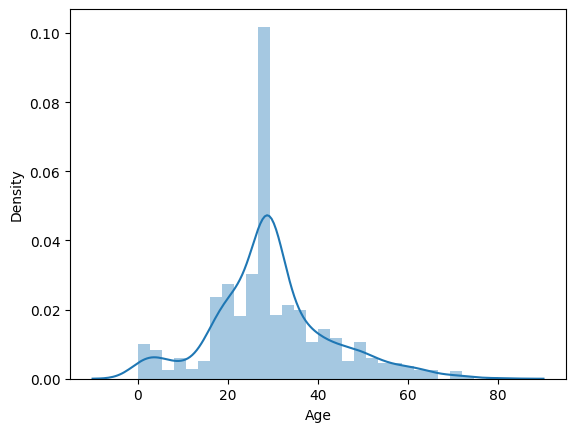

In [23]:
# Age:
sns.distplot(df['Age'])

0.45956263424701577
0.9865867453652877


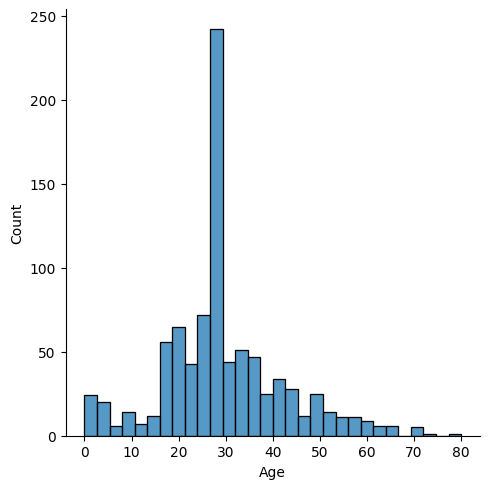

In [24]:
sns.displot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

# We can Oberserve a NORMAL DISTRIBUTION from the above graphs

Skewness : It is roughly a normal distribution As from -5 to 5 it is a normal distribution.

Kurtosis : Not soo peek, majority of people from age 20 to30 t0 40

In [25]:
# Boxplot ---> DUE***

# Conclusion:
* Age can be considered as the normal distribution 
* Outlier Dection required

C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\2085483730.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

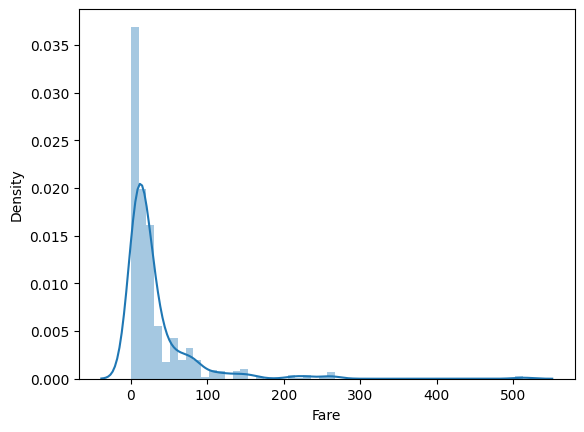

In [26]:
# Fare
sns.distplot(df['Fare'])

In [27]:
# observation : it is left skewed

In [28]:
print(f"People with fare less than $200  are {df[(df['Fare'] < 200)].shape[0]}")
print(f"People with fare in between $200 and $300 are {df[(df['Fare']>200) & (df['Fare']<300)].shape[0]}")
print(f"People fare greater than $300 are {df[df['Fare']>300].shape[0]}")

People with fare less than $200  are 871
People with fare in between $200 and $300 are 17
People fare greater than $300 are 3


In [29]:
# We can observe outliers in the data as the it is highly skewed.

# Multivariate analysis:

In [30]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S


In [31]:
# Survival with Pclass: (using crosstab())
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [32]:
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [33]:
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [34]:
# Survival with Embarked:
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\580432307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\580432307.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

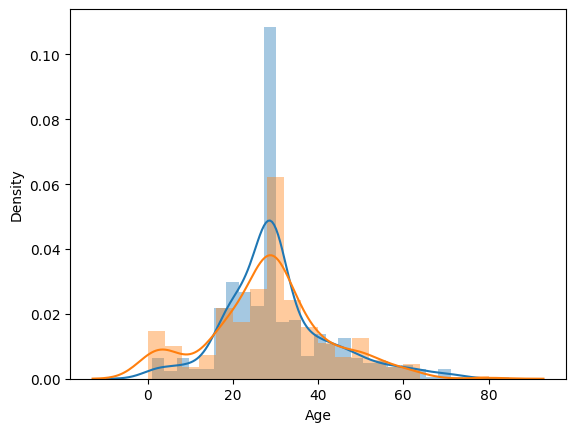

In [35]:
# Survived with Age:
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\3587633168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Fare'])
C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\3587633168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 1]['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

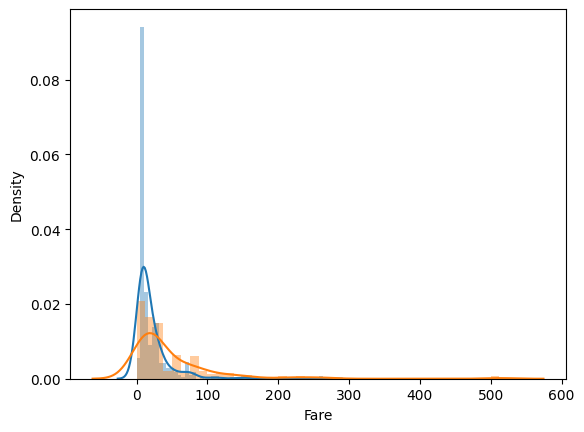

In [36]:
# Survived with Fare:
sns.distplot(df[df['Survived'] == 0]['Fare'])
sns.distplot(df[df['Survived'] == 1]['Fare'])

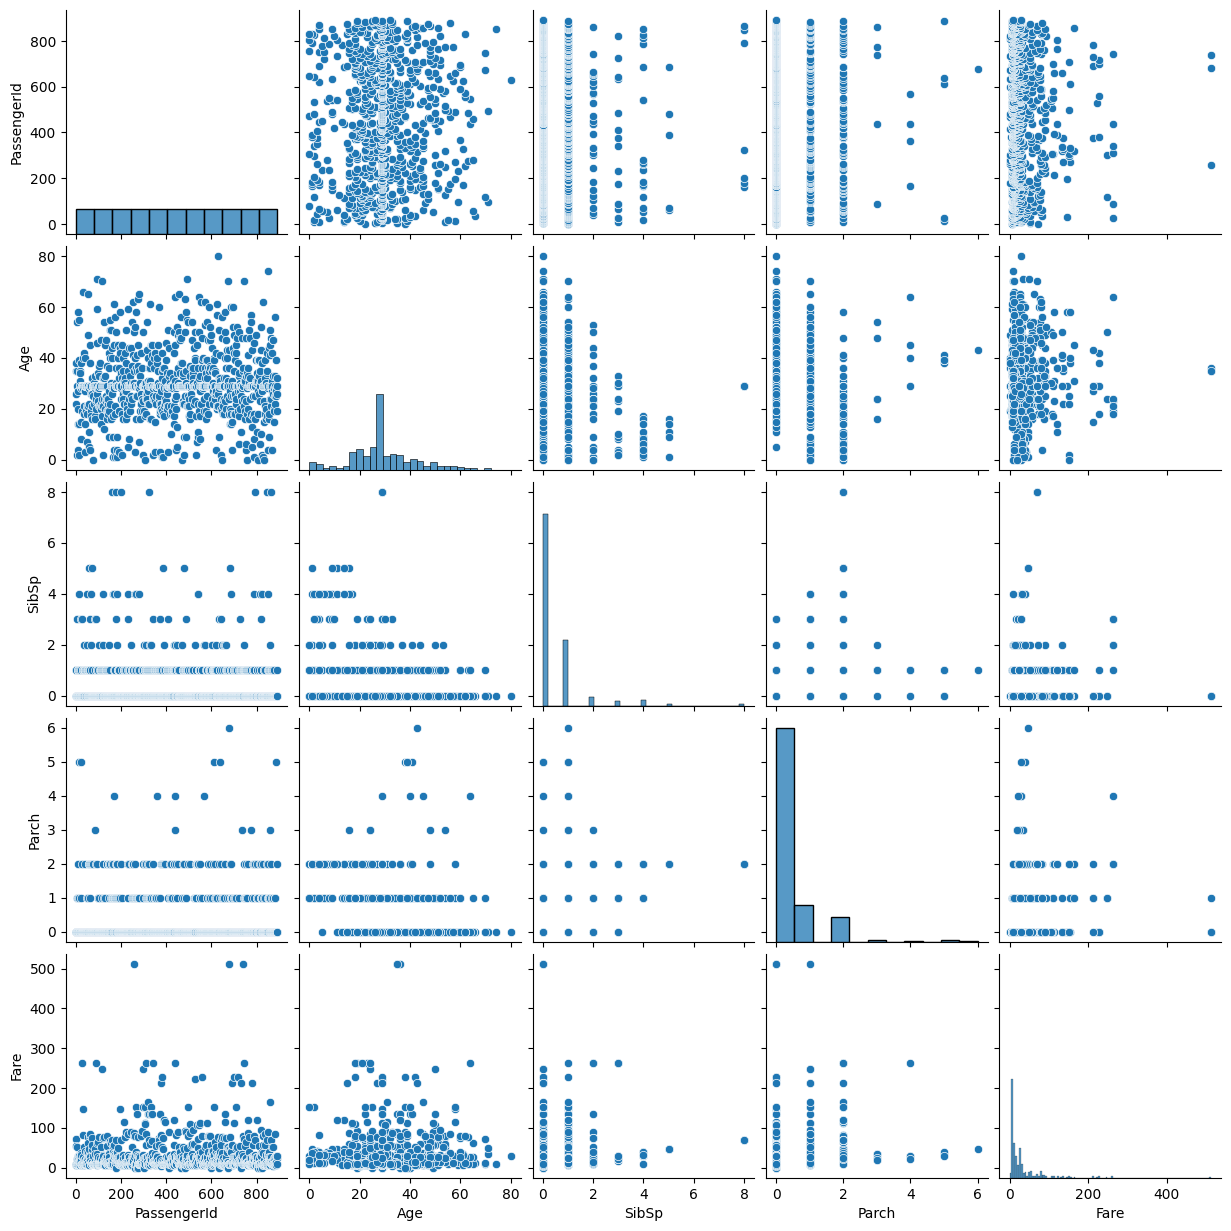

In [37]:
sns.pairplot(df)

In [38]:
# Pairplot : to draw graph with every column with every column

C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

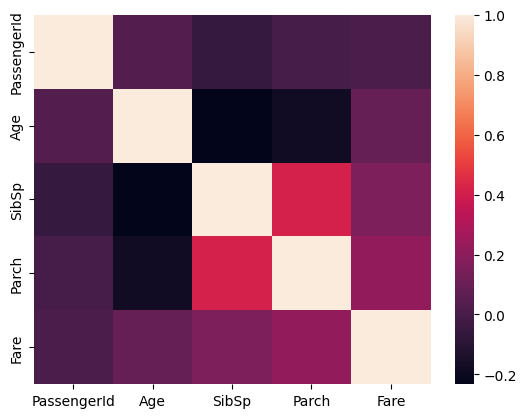

In [39]:
sns.heatmap(df.corr())

In [40]:
# Feature Engeering
# Adding one columns 'family_size' by sumation of col 'SibSp' and 'Parch' 
df['family_size'] = df['SibSp'] + df['Parch']

In [41]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [42]:
# Engineering a new feature by the name of family_type:
def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium_family"
    else:
        return "Large_family"

In [43]:
df['family_type']=df['family_size'].apply(family_type)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium_family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium_family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium_family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [45]:
# Now we can drop Parch and SibSp and family_size
df.drop(columns=['SibSp','Parch','family_size'], inplace=True)

In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
839,840,1,1,"Marechal, Mr. Pierre",male,29,11774,29.7000,C,Alone
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29,PC 17604,82.1708,C,Medium_family
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19,350046,7.8542,S,Medium_family
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9,C.A. 37671,15.9000,S,Medium_family
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,29,386525,16.1000,S,Medium_family


In [47]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis = 1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large_family,85.1,14.9
Medium_family,44.0,56.0


# Decting Outlier:

In [48]:
# **** DUE : not done yet *****
#  Numerical Data
# * if the data is following normal distribution, anything beyond 3SD-mean + 3SD can be considered as outlier
# * But if it does not follow normal distribution, using boxplot we can eliminate points beyond Q1- 1.5 IQR and Q3 + 1.5 IQR

# Categorical Data
# * If the columns are highly imbalanced eg male 10000 and female 2 then we can eleminate female

# Converting the categorical data to num:

In [49]:
# While converting the categorical data into numeric values, we encounter a problem,
# eg: if we convert city/Embarked into num, we can get 3 values i.e 0,1,2 accordingly,
#     but the problem is  model during analysis take the city with value 2 as on higher priority,
#     so rather than this , we can create three columns of each city and give values 0 and 1 (0->not, 1->yes).
# We can also analyse from 2 columns only rather than 3, (Using Multicolinearity), 
# So we can remove any one column.

# And this all process can be performed by .get_dummies() function of pandas

In [50]:
# One hot encoding : TO convert the categorical data to numerical values
df.sample(4)
# Columns to be transformed are Pclass, Sex, Embarked, family_type
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked', 'family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large_family,family_type_Medium_family
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [53]:
df = pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked','family_type'], drop_first=True)

In [54]:
df.sample(4)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large_family,family_type_Medium_family
732,733,0,"Knight, Mr. Robert J",29,239855,0.0000,1,0,1,0,1,0,0
145,146,0,"Nicholls, Mr. Joseph Charles",19,C.A. 33112,36.7500,1,0,1,0,1,0,1
380,381,1,"Bidois, Miss. Rosalie",42,PC 17757,227.5250,0,0,0,0,0,0,0
710,711,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",24,PC 17482,49.5042,0,0,0,0,0,0,0


C:\Users\HEMANT\AppData\Local\Temp\ipykernel_4940\2646502391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='summer')


<AxesSubplot: >

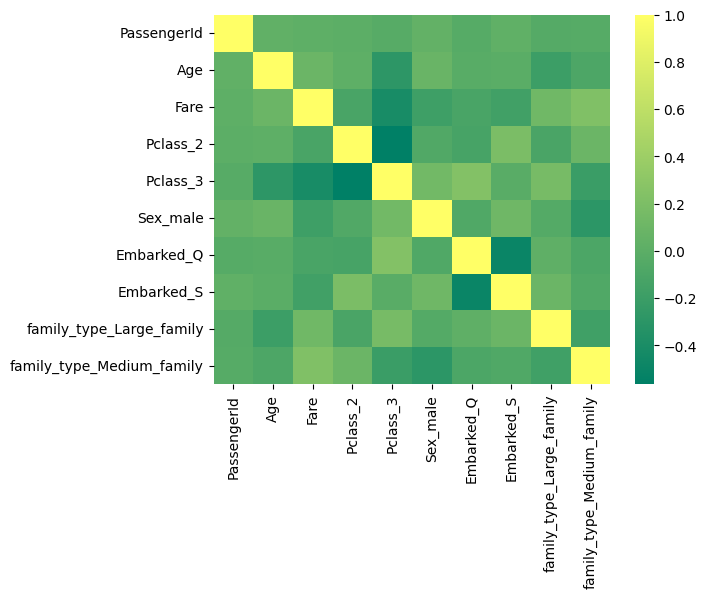

In [55]:
# plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

# Drawing Conclusions:
* female survival is higher than male survival
* Travelling in Pclass 3 was deadliest
* People in the age range of 20 t0 40 had a higher chances of not surviving
* People travelling with smaller(medium) families had a higher chances of surviving in comparission to people with large families and the one travelling alone.